In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [373]:
list_df = pd.read_csv("app/data/listings.csv")
trans_df = pd.read_csv("app/data/transactions.csv")

In [374]:
# Convert all timestamps to normal time stamps
trans_df['create_timestamp'] = pd.to_datetime(trans_df['create_timestamp'], unit='s')
trans_df['created_timestamp'] = pd.to_datetime(trans_df['created_timestamp'], unit='s')
trans_df['paid_timestamp'] = pd.to_datetime(trans_df['paid_timestamp'], unit='s')
trans_df['shipped_timestamp'] = pd.to_datetime(trans_df['shipped_timestamp'], unit='s')

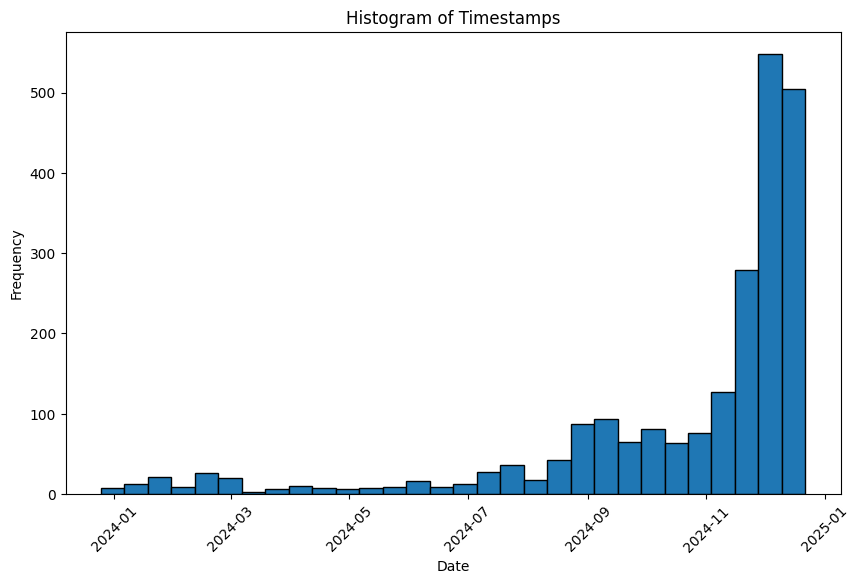

In [375]:
plt.figure(figsize=(10, 6))
plt.hist(trans_df['create_timestamp'], bins=30, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Timestamps')
plt.xticks(rotation=45)
plt.show()

In [376]:
trans_df['hour'] = trans_df['create_timestamp'].dt.hour
trans_df['time_period'] = pd.cut(trans_df['hour'], bins=[0, 3, 6, 9, 12, 15, 18, 21, 24], labels=['12am-3am', '3am-6am', '6am-9am', '9am-12pm', '12pm-3pm', '3pm-6pm', '6pm-9pm', '9pm-12am'], right=False)


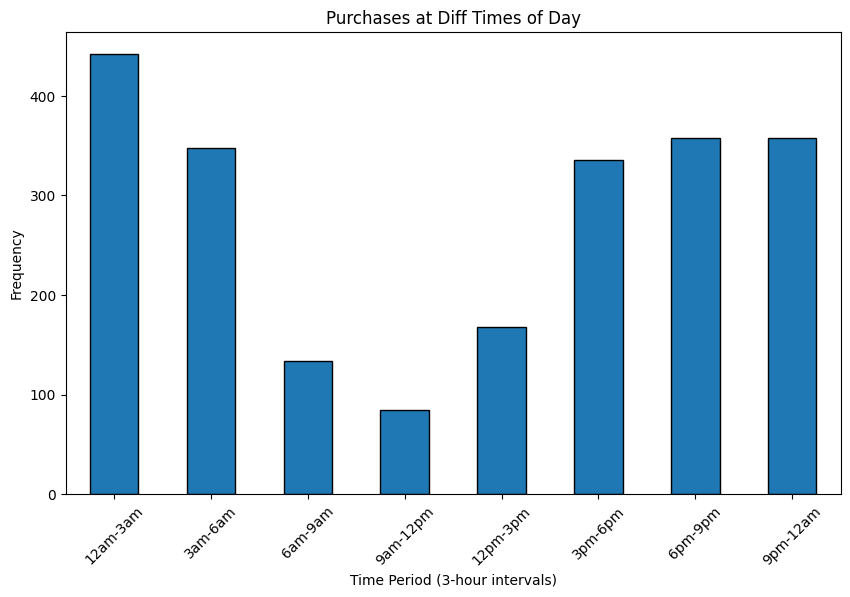

In [377]:
plt.figure(figsize=(10, 6))
trans_df['time_period'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('Time Period (3-hour intervals)')
plt.ylabel('Frequency')
plt.title('Purchases at Diff Times of Day')
plt.xticks(rotation=45)
plt.show()


In [378]:
def shorten(input_string):
    """Return the first 20 characters of the title."""
    return input_string[:20]

In [379]:
# Which products are sellign the most?
products = {}
for title in trans_df['title']:
    if shorten(title) in products:
        products[shorten(title)] += 1
    else:
        products[shorten(title)] = 1

In [380]:
print(products)

{'Minye TShirt | Curse': 468, 'Pakmon Snorx Funny I': 1, 'Diabetes Conqueror U': 33, 'I Love Miners Unisex': 96, 'Tummy Hurts Knight i': 19, 'i suffer from mental': 7, 'War Cat in the Battl': 94, 'Autistic and Gay Ske': 199, 'Rippit - Funny Unise': 276, 'Swiggity Swooty Pota': 9, 'Fight or Flxight, Cu': 28, 'They Don&#39;t Under': 38, 'Support Your Local P': 13, 'Minion Lisa Parody T': 6, 'Fried Chicken 420 Sh': 181, 'Born on the Cob Corn': 2, 'Diamond Armor Cat an': 1, 'Autism Wizard Fantas': 1, 'Respect Women Minion': 4, 'Existence is Pain Au': 30, 'Feminism Sigma Donke': 46, 'Peace Was Never an O': 3, 'High On Life Meth Fu': 11, 'Fattest Ass Award St': 1, 'Autism Vintage T-Shi': 47, 'Christminye Christma': 6, 'You&#39;re Telling M': 80, 'You&#39;ve Lost PeeP': 16, 'Forced to Shit, Born': 2, 'Christ and Minye Uni': 12, 'Why Yes I&#39;m An A': 19, 'Vintage 90s I Got Th': 16, 'MILF- Man I Love Fel': 8, 'Minye Sweatshirt | F': 3, 'Hard Shrimp Dunking ': 7, 'I&#39;m Down To Fry ': 7, 'Pl

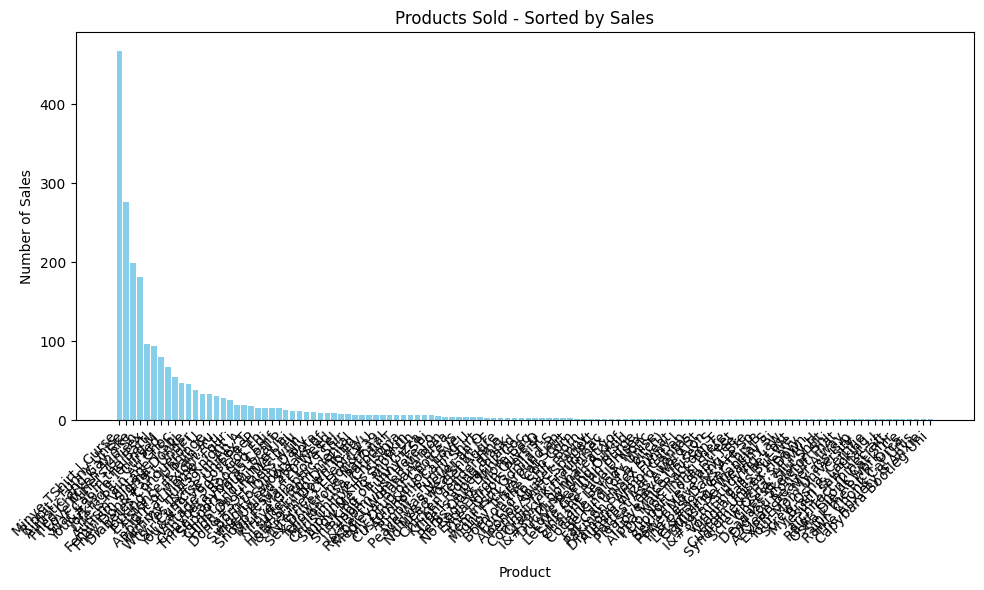

In [381]:
# Sort the dictionary by values (highest first)
sorted_products = dict(sorted(products.items(), key=lambda item: item[1], reverse=True))

# Extract keys and values
product_names = list(sorted_products.keys())
sales_counts = list(sorted_products.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(product_names, sales_counts, color='skyblue')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.title('Products Sold - Sorted by Sales')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()


## What tags have been having the most amount of favorite?

In [382]:
# Convert the strings in the 'tags' column to actual lists
list_df['tags'] = list_df['tags'].apply(ast.literal_eval)

In [383]:
# Explode the tags column to have one tag per row
df_exploded = list_df.explode('tags')

# Display the exploded DataFrame
print(df_exploded)


     listing_id    user_id   shop_id   
0    1752207690  879431180  48928507  \
0    1752207690  879431180  48928507   
0    1752207690  879431180  48928507   
0    1752207690  879431180  48928507   
0    1752207690  879431180  48928507   
..          ...        ...       ...   
164  1645291547  879431180  48928507   
164  1645291547  879431180  48928507   
164  1645291547  879431180  48928507   
164  1645291547  879431180  48928507   
164  1645291547  879431180  48928507   

                                                 title   
0    Autistic and Gay Skeleton Explosion Shirt, Unh...  \
0    Autistic and Gay Skeleton Explosion Shirt, Unh...   
0    Autistic and Gay Skeleton Explosion Shirt, Unh...   
0    Autistic and Gay Skeleton Explosion Shirt, Unh...   
0    Autistic and Gay Skeleton Explosion Shirt, Unh...   
..                                                 ...   
164  Kitten Overlords Unisex Tshirt, Cat Shirt, Cat...   
164  Kitten Overlords Unisex Tshirt, Cat Shirt, Cat... 

In [384]:
# Group by the tags and sum the favorers for each tag
tag_weights = df_exploded.groupby('tags')['num_favorers'].mean()

# Display the tag weights
print(tag_weights)


tags
2000s shirt               4.0
2000s style shirt         6.0
420 Blaze It Shirt      463.5
420 TShirt              905.0
420 blaze it             34.0
                        ...  
yellowstone national     18.0
yellowstone shirt        18.0
yellowstone sweater      18.0
you're on drugs           4.0
zu za zazu                7.0
Name: num_favorers, Length: 1440, dtype: float64


In [385]:
# Sort the tags by their weights (favorers sum) in descending order
sorted_tag_weights = tag_weights.sort_values(ascending=False)

# Display the sorted tag weights
print(sorted_tag_weights)


tags
Gifts For Friends       1599.0
Funny Ironic Tshirt     1599.0
Cursed                  1096.5
Stupid Shirt             958.0
Stoner Shirt             905.0
                         ...  
Traveling Gift             0.0
Travel Tee                 0.0
oddly specific shirt       0.0
cute crop top              0.0
hilarious t-shirts         0.0
Name: num_favorers, Length: 1440, dtype: float64


In [386]:
sorted_tag_weights[:10]

tags
Gifts For Friends      1599.000000
Funny Ironic Tshirt    1599.000000
Cursed                 1096.500000
Stupid Shirt            958.000000
Stoner Shirt            905.000000
Stoned Frog Shirt       905.000000
420 TShirt              905.000000
Rippit Shirt            905.000000
Funny Meme Shirt        831.500000
Cursed Shirt            752.333333
Name: num_favorers, dtype: float64

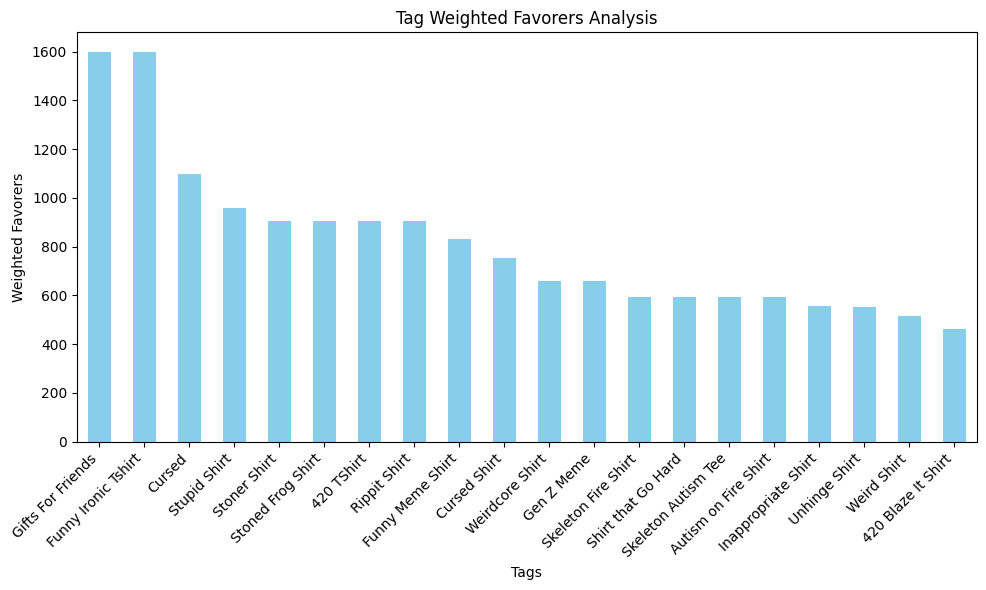

In [387]:
import matplotlib.pyplot as plt

# Plotting the weighted favorers for each tag
plt.figure(figsize=(10, 6))
sorted_tag_weights[:20].plot(kind='bar', color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Weighted Favorers')
plt.title('Tag Weighted Favorers Analysis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Calculate Profit

In [388]:
trans_df['price'] = trans_df['price'].apply(ast.literal_eval)
print(trans_df['price'][0])

{'amount': 3142, 'divisor': 100, 'currency_code': 'USD'}


In [389]:
# # Define the shipping prices for the United States
# us_shipping_price_mapping = {
#     220705902446: 4.98,  # Normal t-shirt
#     221188090392: 4.58,  # Sweaters
#     242814714553: 7.74,  # Express t-shirt
#     245343615459: 7.69,  # Sweater and baby top
#     255343347175: 8.49   # Hoodie
# }

# # Define the shipping prices for the United Kingdom
# uk_shipping_price_mapping = {
#     220705902446: 8.50,  # Normal t-shirt
#     221188090392: 7.30,  # Sweaters
#     242814714553: 10.00, # Express t-shirt
#     245343615459: 9.20,  # Sweater and baby top
#     255343347175: 12.00  # Hoodie
# }

# # Apply the logic
# def calculate_shipping_price(row):
#     if row['country'] == "United States":
#         return us_shipping_price_mapping.get(row['shipping_profile_id'], 100.0)  # Default $100 if profile_id not found
#     elif row['country'] == "United Kingdom":
#         return uk_shipping_price_mapping.get(row['shipping_profile_id'], 100.0)  # Default $100 if profile_id not found
#     else:
#         return 10.0  # Default for other countries

# # Create the column
# trans_df['shipping_price_etsy'] = trans_df.apply(calculate_shipping_price, axis=1)

# # Add 1 for each additional  (just estimate for now)
# additional_item_cost = 1
# trans_df['shipping_price_etsy'] = trans_df['quantity'] * additional_item_cost


In [390]:
# # Total etsy revenue is the price - discount + shipping price we charge
# trans_df['revenue'] = trans_df.apply(lambda row: (row['price']['amount']/row['price']['divisor'] - row['shop_coupon']) * row['quantity'] + row['shipping_price_etsy'], axis=1)
# trans_df['revenue']

Bring in the printify dataset (costs)

In [391]:
printify_df = pd.read_csv("all_shops_orders.csv")
printify_df['Metadata'] = printify_df['Metadata'].apply(ast.literal_eval)
printify_df['Shop Order ID'] = printify_df['Metadata'].apply(lambda x: x.get('shop_order_id',0) if isinstance(x,dict) else 0)
printify_df['Total Price'] = pd.to_numeric(printify_df['Total Price']/100, errors='coerce')
printify_df['Total Shipping'] = pd.to_numeric(printify_df['Total Shipping']/100, errors='coerce')
printify_df.head()

,Shop Title,Order ID,App Order ID,Shop ID,First Name,Last Name,Email,Address,City,Region,Country,ZIP Code,Total Price,Total Shipping,Status,Created At,Line Items,SKU,Metadata,Shop Order ID
0,Voyage Earth Studios,676c3c6c6fe42007a5083044,1.329731e+07,13297310,Hank,Yang,hankyang22@gmail.com,474C Laurel Brook Dr,Brick,NJ,United States,08724,0.00,0.00,canceled,2024-12-25 17:10:04+00:00,AS Colour Relaxed Hoodie Embroidery Test (Qty:...,54716365272972078142,{'order_type': 'sample'},0
1,Design Tees Central,67704f480998ccbc870d013c,1.329733e+07,13297332,Skylar,Singer,skylarsinger15@gmail.com,607 Lindsay St Apt 2,CHATTANOOGA,TN,United States,37403-3427,7.56,5.15,on-hold,2024-12-28 19:19:36+00:00,"You've Lost PeePee Privilege | Unhinge Shirt, ...",20953718526673158128,"{'order_type': 'api', 'shop_order_id': '355542...",3555424809
2,Design Tees Central,67704f47d7a61c55f908b9e7,1.329733e+07,13297332,Andrew,Grafham,grafhama@yahoo.co.uk,48 Chatsworth Avenue,Winnersh,BERKS,United Kingdom,RG41 5EU,7.56,10.00,on-hold,2024-12-28 19:19:35+00:00,"Autistic and Gay Skeleton Explosion Shirt, Unh...",25241091282727145870,"{'order_type': 'api', 'shop_order_id': '355539...",3555399385
3,Design Tees Central,6770328f0fb54148370139a8,1.329733e+07,13297332,Hanhee,Yang,NaN,474C Laurel Brook Dr,Brick Township,NJ,United States,08724,4.28,5.26,in-production,2024-12-28 17:17:03+00:00,"Kiss-Cut Stickers (Qty: 4, Variant: 2"" × 2"" / ...",30487995508076928344,{'order_type': 'sample'},0
4,Design Tees Central,6770070f83e9b993210e1594,1.329733e+07,13297332,Sellina,Rogers,cheli_142000@yahoo.com,4407 Stetson Run,San Antonio,TX,United States,78223,7.56,5.15,in-production,2024-12-28 14:11:27+00:00,"rippit bong frog (Qty: 1, Variant: Black / XL)",17892633718017203696,{'order_type': 'api'},0


In [392]:
trans_df['receipt_id'] = trans_df['receipt_id'].apply(str)
printify_df['Shop Order ID'] = printify_df['Shop Order ID'].apply(str)


In [393]:
print(f"there are {printify_df.shape[0]} rows in printify datasets")
print(f"there are {trans_df.shape[0]} rows in etsy transaction datasets")

there are 6662 rows in printify datasets
there are 2228 rows in etsy transaction datasets


In [394]:
# Creating a custom ID so that I can join SKUs and the shop order ID. I will need to take into account the quantity value later too.
trans_df['custom_receipt_id'] = trans_df['receipt_id'] + "_" + trans_df['sku']
printify_df['Customer Shop Order ID'] = printify_df['Shop Order ID'] + "_" + printify_df['SKU']

In [395]:
printify_df['Customer Shop Order ID']

0                         0_54716365272972078142
1                3555424809_20953718526673158128
2                3555399385_25241091282727145870
3                         0_30487995508076928344
4                         0_17892633718017203696
                          ...                   
6657    111-3461724-0139400_94500761663685766504
6658    114-0554831-6819458_24171544626595038061
6659    111-3597639-1318623_15747040283222665970
6660    114-8121364-7197025_32406673236001986485
6661    111-8364816-3696224_74031208507394216128
Name: Customer Shop Order ID, Length: 6662, dtype: object

Create orders_df by merging etsy and printify orders data

In [396]:
# I need to factor in quantity here
trans_df.columns

Index(['transaction_id', 'title', 'description', 'seller_user_id',
       'buyer_user_id', 'create_timestamp', 'created_timestamp',
       'paid_timestamp', 'shipped_timestamp', 'quantity', 'listing_image_id',
       'receipt_id', 'is_digital', 'file_data', 'listing_id', 'sku',
       'product_id', 'transaction_type', 'price', 'shipping_cost',
       'variations', 'product_data', 'shipping_profile_id',
       'min_processing_days', 'max_processing_days', 'shipping_method',
       'shipping_upgrade', 'expected_ship_date', 'buyer_coupon', 'shop_coupon',
       'hour', 'time_period', 'custom_receipt_id'],
      dtype='object')

In [397]:
orders_df = trans_df.merge(printify_df, left_on='custom_receipt_id', right_on='Customer Shop Order ID', how='left')
# orders_df = trans_df.merge(printify_df, left_on='receipt_id', right_on='Shop Order ID', how='left')

In [398]:
# Define the shipping prices for the United States
us_shipping_price_mapping = {
    220705902446: 4.98,  # Normal t-shirt
    221188090392: 4.58,  # Sweaters
    242814714553: 7.74,  # Express t-shirt
    245343615459: 7.69,  # Sweater and baby top
    255343347175: 8.49   # Hoodie
}

# Define the shipping prices for the United Kingdom
uk_shipping_price_mapping = {
    220705902446: 8.50,  # Normal t-shirt
    221188090392: 7.30,  # Sweaters
    242814714553: 10.00, # Express t-shirt
    245343615459: 9.20,  # Sweater and baby top
    255343347175: 12.00  # Hoodie
}

# Apply the logic
def calculate_shipping_price(row):
    if row['Country'] == "United States":
        return us_shipping_price_mapping.get(row['shipping_profile_id'], 100.0)  # Default $100 if profile_id not found
    elif row['Country'] == "United Kingdom":
        return uk_shipping_price_mapping.get(row['shipping_profile_id'], 100.0)  # Default $100 if profile_id not found
    else:
        return 10.0  # Default for other countries

# Create the column
orders_df['shipping_price_etsy'] = orders_df.apply(calculate_shipping_price, axis=1)

# Add 1 for each additional  (just estimate for now)
additional_item_cost = 1
orders_df['shipping_price_etsy'] = orders_df['quantity'] * additional_item_cost


In [399]:
# Total etsy revenue is the price - discount + shipping price we charge
orders_df['revenue'] = orders_df.apply(lambda row: (((row['price']['amount']/row['price']['divisor'])* row['quantity'] - row['shop_coupon']) + row['shipping_price_etsy']), axis=1)
orders_df['revenue']

0       16.08
1       16.56
2       16.08
3       16.08
4       16.08
        ...  
2223    13.91
2224    13.90
2225    15.12
2226    17.12
2227    15.13
Name: revenue, Length: 2228, dtype: float64

In [400]:
orders_df['revenue'] = pd.to_numeric(orders_df['revenue'], errors='coerce')
orders_df['Final Cost'] = orders_df['Total Price'] + orders_df['Total Shipping']
orders_df['Profit'] = orders_df['revenue'] - orders_df['Final Cost']
orders_df = orders_df[orders_df['Status']!='canceled'] # we can take this out, if you want the canceled orders too

orders_df.head()

,transaction_id,title,description,seller_user_id,buyer_user_id,create_timestamp,created_timestamp,paid_timestamp,shipped_timestamp,quantity,...,Created At,Line Items,SKU,Metadata,Shop Order ID,Customer Shop Order ID,shipping_price_etsy,revenue,Final Cost,Profit
0,4419110423,"Minye TShirt | Cursed Shirt, Weirdcore, Shirt ...",📦 SHIPPING\n\nCOMFORT COLORS (Pepper):\nWe shi...,879431180,1028020938,2024-12-21 22:32:17,2024-12-21 22:32:17,2024-12-21 22:32:36,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.08,NaN,NaN
1,4419048589,"Pakmon Snorx Funny Ironic Gamer Shirt, Cute Ga...",📦 SHIPPING\n\nCOMFORT COLORS (Pepper):\nWe shi...,879431180,352062973,2024-12-21 21:33:27,2024-12-21 21:33:27,2024-12-21 21:33:59,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.56,NaN,NaN
2,4418925659,"Diabetes Conqueror Unisex Ironic Funny Shirt, ...","Diabetes Conqueror Unisex Ironic Funny Shirt, ...",879431180,1027983410,2024-12-21 19:44:22,2024-12-21 19:44:22,2024-12-21 19:44:28,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.08,NaN,NaN
3,4418903395,"I Love Miners Unisex Shirt, Unhinged Shirt, Sh...",NOT AN OFFICIAL MINECRAFT PRODUCT. NOT APPROVE...,879431180,541687055,2024-12-21 19:24:14,2024-12-21 19:24:14,2024-12-21 19:24:20,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.08,NaN,NaN
4,4418534605,Tummy Hurts Knight in a Field Unisex TShirt | ...,📦 SHIPPING\n\nCOMFORT COLORS (Pepper):\nWe shi...,879431180,923215781,2024-12-21 13:04:20,2024-12-21 13:04:20,2024-12-21 13:04:27,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.08,NaN,NaN


In [401]:
# orders_df[['sku', 'SKU']].head(10)
orders_df[['custom_receipt_id', 'Customer Shop Order ID']].head(10)

,custom_receipt_id,Customer Shop Order ID
0,3545182824_25499982943226709556,NaN
1,3549715527_18290365285123428287,NaN
2,3545046426_20677616772367765250,NaN
3,3549592717_13825067937846909291,NaN
4,3544752224_24365729001644568981,NaN
5,3544604100_48430752509213492985,NaN
6,3544551092_40561465359701469747,NaN
7,3548972373_25499982943226709556,NaN
8,3544477648_30105911100340592677,NaN
9,3548626705_33540336797320747673,NaN


In [405]:
orders_df.count()

transaction_id            2225
title                     2225
description               2225
seller_user_id            2225
buyer_user_id             2225
create_timestamp          2225
created_timestamp         2225
paid_timestamp            2225
shipped_timestamp         2196
quantity                  2225
listing_image_id          2225
receipt_id                2225
is_digital                2225
file_data                    0
listing_id                2225
sku                       2225
product_id                2225
transaction_type          2225
price                     2225
shipping_cost             2225
variations                2225
product_data              2225
shipping_profile_id       2225
min_processing_days       2225
max_processing_days       2225
shipping_method              0
shipping_upgrade             1
expected_ship_date        2225
buyer_coupon              2225
shop_coupon               2225
hour                      2225
time_period               2225
custom_r

In [404]:
orders_df.head()

,transaction_id,title,description,seller_user_id,buyer_user_id,create_timestamp,created_timestamp,paid_timestamp,shipped_timestamp,quantity,...,Created At,Line Items,SKU,Metadata,Shop Order ID,Customer Shop Order ID,shipping_price_etsy,revenue,Final Cost,Profit
0,4419110423,"Minye TShirt | Cursed Shirt, Weirdcore, Shirt ...",📦 SHIPPING\n\nCOMFORT COLORS (Pepper):\nWe shi...,879431180,1028020938,2024-12-21 22:32:17,2024-12-21 22:32:17,2024-12-21 22:32:36,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.08,NaN,NaN
1,4419048589,"Pakmon Snorx Funny Ironic Gamer Shirt, Cute Ga...",📦 SHIPPING\n\nCOMFORT COLORS (Pepper):\nWe shi...,879431180,352062973,2024-12-21 21:33:27,2024-12-21 21:33:27,2024-12-21 21:33:59,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.56,NaN,NaN
2,4418925659,"Diabetes Conqueror Unisex Ironic Funny Shirt, ...","Diabetes Conqueror Unisex Ironic Funny Shirt, ...",879431180,1027983410,2024-12-21 19:44:22,2024-12-21 19:44:22,2024-12-21 19:44:28,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.08,NaN,NaN
3,4418903395,"I Love Miners Unisex Shirt, Unhinged Shirt, Sh...",NOT AN OFFICIAL MINECRAFT PRODUCT. NOT APPROVE...,879431180,541687055,2024-12-21 19:24:14,2024-12-21 19:24:14,2024-12-21 19:24:20,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.08,NaN,NaN
4,4418534605,Tummy Hurts Knight in a Field Unisex TShirt | ...,📦 SHIPPING\n\nCOMFORT COLORS (Pepper):\nWe shi...,879431180,923215781,2024-12-21 13:04:20,2024-12-21 13:04:20,2024-12-21 13:04:27,NaT,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,16.08,NaN,NaN


In [403]:
# Save to csv
orders_df.to_csv('orders.csv', index=False)

Let's make the visualization

In [ ]:
# Filter out the columns where the order type is sample and the status is canceled. 

vis_df = orders_df[orders_df['Status']!='canceled']
vis_df = vis_df[vis_df['Metadata']['order_type']!='sample']